In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [3]:
from pycaret.utils import version
version()

'3.2.0'

In [4]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [22]:
dataset = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [23]:
dataset.to_csv("dataset.csv")
from google.colab import files

**kMeans Clustering**

In [24]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(dataset)

,Description,Value
0,Session id,367
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [25]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5353,518.8467,1.5623,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0,5,1,1,1,2,1,3,1,1,Cluster 0
1,0,5,4,4,5,7,10,3,2,1,Cluster 1
2,0,3,1,1,1,2,2,3,1,1,Cluster 0
3,0,6,8,8,1,3,4,3,7,1,Cluster 3
4,0,4,1,1,3,2,1,3,1,1,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1,Cluster 0
679,0,2,1,1,1,2,1,1,1,1,Cluster 0
680,1,5,10,10,3,7,3,8,10,2,Cluster 3
681,1,4,8,6,4,3,4,10,6,1,Cluster 3


In [27]:
kMeanPrediction.to_csv("KMeanResult.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


In [28]:
from google.colab import files
files.download('KMeanResult.csv')      # Uncomment this line
# Open and Explore result file (KMeanResult.csv).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [30]:
from google.colab import files
# files.download('kMeanClusteringModelFile.pkl')

**CLUSTERING**

In [31]:
newData = get_data("cancer").iloc[:10]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [32]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
1,0.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,Cluster 1
2,0.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,Cluster 0
3,0.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,Cluster 3
4,0.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
5,1.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,Cluster 2
6,0.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,Cluster 0
7,0.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
8,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,Cluster 0
9,0.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,Cluster 0


**Evaluating Cluster Model**

In [33]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:
# 2D plot
plot_model(KMeanClusteringModel, plot='cluster')

In [35]:
#3D plot
plot_model(KMeanClusteringModel, plot = 'tsne')

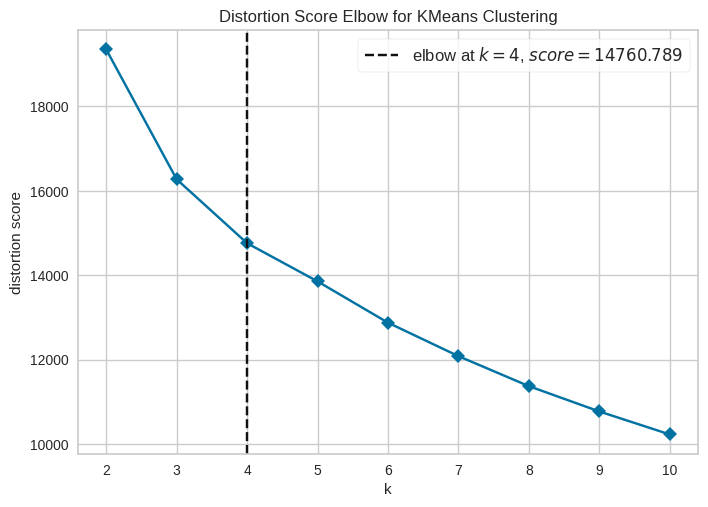

In [36]:
#Elbow Plot
plot_model(KMeanClusteringModel, plot = 'elbow')

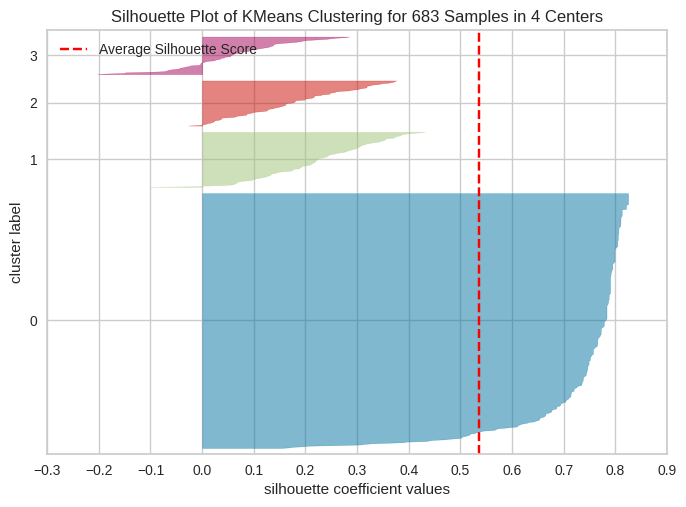

In [37]:
#Silhouette Plot
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [38]:
# Distribution Plot
plot_model(KMeanClusteringModel, plot = 'distribution')

# **Clustering (KMean)**

In [39]:

# For Cluster = 3, 4, 5, 6
from pycaret.datasets import get_data
from pycaret.clustering import *

blood_dataset = get_data('blood', verbose=False)
setup(data = blood_dataset, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6811,1494.7254,0.4279,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6236,2829.6787,0.4866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6287,3311.6492,0.4587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [40]:
import pandas as pd

# Create an empty list to store model summaries
model_summaries = []

# Iterate through different cluster numbers
for num_clusters in [3, 4, 5, 6]:
    print(f"For Cluster = {num_clusters}")

    # Create the KMeans model
    model = create_model('kmeans', num_clusters=num_clusters)

    # Get the model summary as a DataFrame
    model_summary = pull()

    # Create a new DataFrame with Cluster Number as the first column
    model_summary.insert(0, "Cluster Number", num_clusters)

    # Append the model summary to the list
    model_summaries.append(model_summary)

# Concatenate all model summaries into a single table
combined_table = pd.concat(model_summaries)

# Display the combined table
print(combined_table)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6811,1494.7254,0.4279,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6329,2286.0617,0.4555,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6236,2829.6787,0.4866,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6287,3311.6492,0.4587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.6811          1494.7254          0.4279            0   
0               4      0.6329          2286.0617          0.4555            0   
0               5      0.6236          2829.6787          0.4866            0   
0               6      0.6287          3311.6492          0.4587            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# ***Clustering: "Data Preprocessing"***

In [43]:
from pycaret.clustering import *
from pycaret.datasets import get_data

dataset = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


**Model Performance using "Normalization"**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5264,545.9763,1.5107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

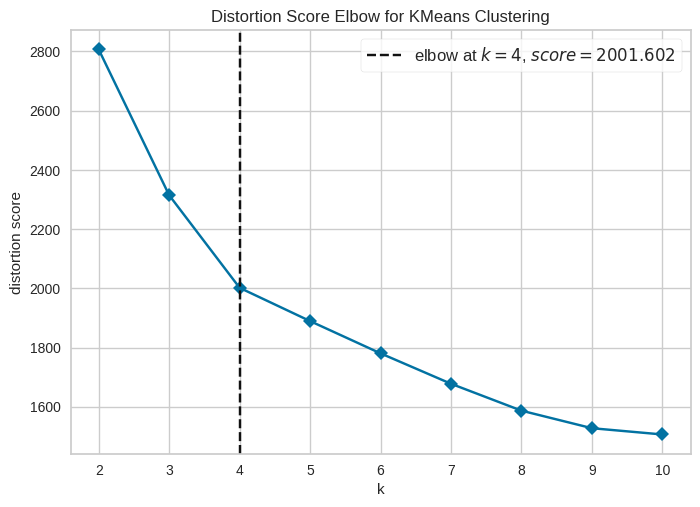

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5756,663.3644,1.1247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5264,545.9763,1.5107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5222,443.3189,1.6630,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2467,385.0297,1.7205,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



In [45]:
#3D Plot for Cluster = 5
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5201,443.6081,1.6525,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation"



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4801,1207.6655,0.7984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

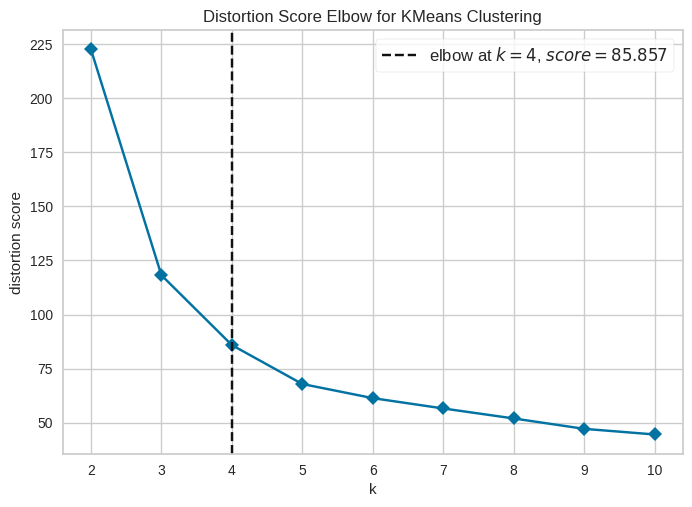

In [46]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = blood_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [47]:
# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4833,1224.8647,0.7399,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4801,1207.6655,0.7984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4461,1189.4876,0.8498,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4241,1065.9824,0.8798,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5362,519.0235,1.5647,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

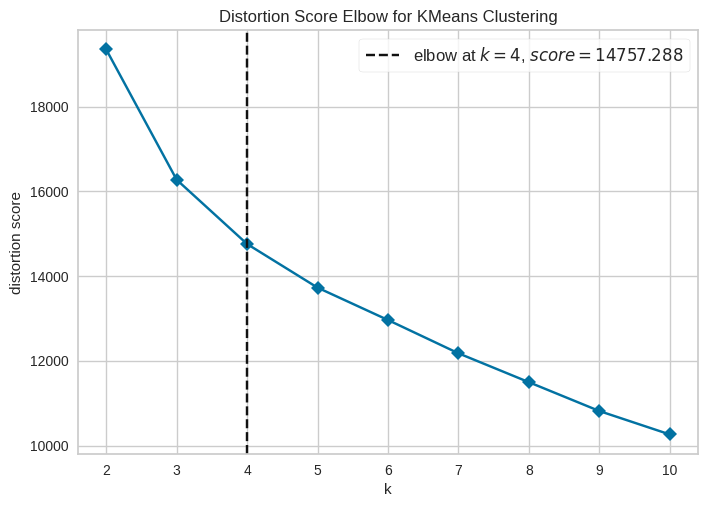

In [48]:
#Elbow Plot
setup(data = blood_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [49]:
#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = blood_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5249,675.2566,1.5375,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5344,518.4882,1.5615,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4629,427.3423,1.7199,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2575,376.0974,1.6438,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

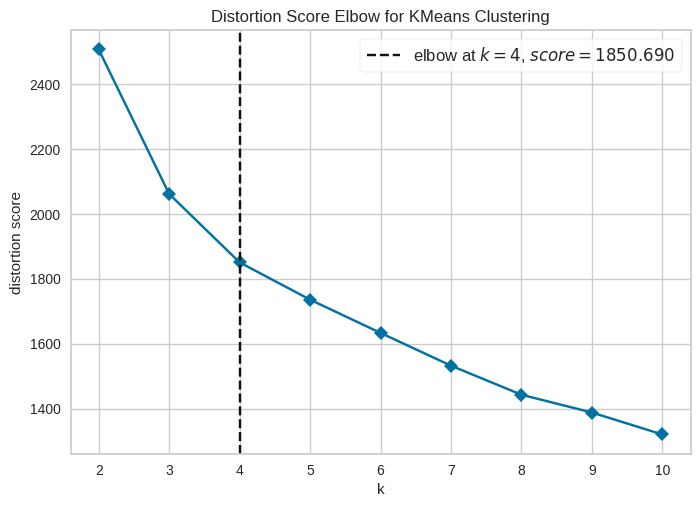

In [50]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = blood_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [51]:
setup(data = blood_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4984,786.5620,1.0845,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2514,496.6271,1.5347,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2511,427.5451,1.5964,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

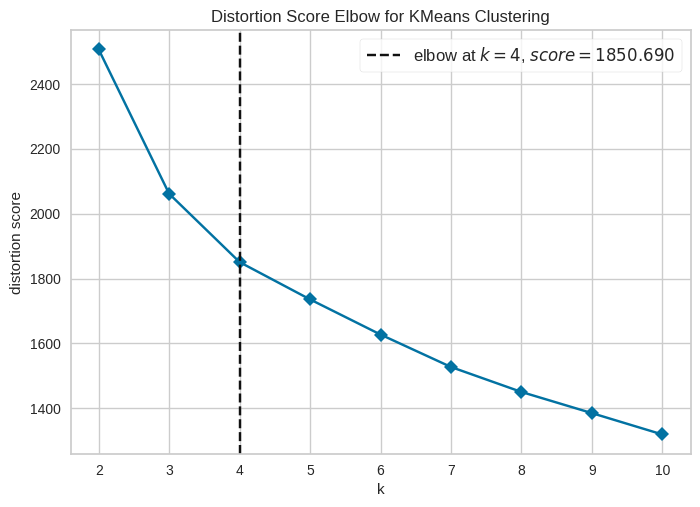

In [52]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot
setup(data = blood_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [53]:
setup(data = blood_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4984,786.5620,1.0845,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2402,495.6892,1.6630,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2654,429.9326,1.4385,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Other Clustering Techniques

**Hierarchical**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

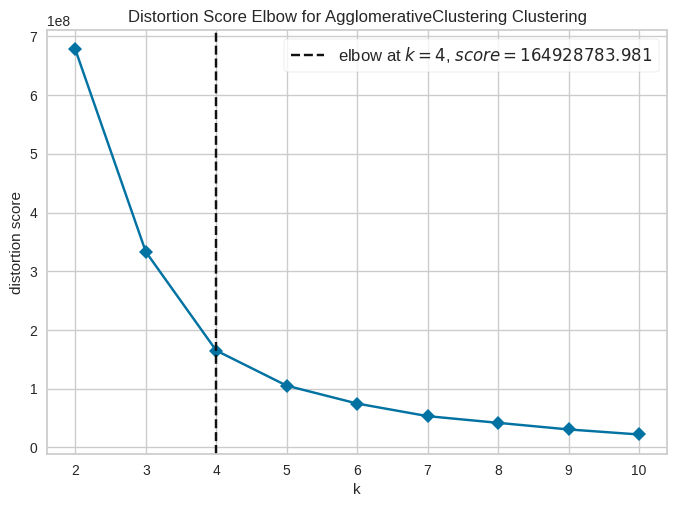

In [54]:
from pycaret.datasets import get_data
from pycaret.clustering import *

bloodDataSet = get_data('blood', verbose=False)
setup(data = bloodDataSet, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [55]:
hierarchicalModel = create_model('hclust', num_clusters=4)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6193,2146.5279,0.4545,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Recency,Frequency,Monetary,Time,Class,Cluster
0,2,50,12500,98,1,Cluster 2
1,0,13,3250,28,1,Cluster 0
2,1,16,4000,35,1,Cluster 0
3,2,20,5000,45,1,Cluster 0
4,1,24,6000,77,0,Cluster 0
...,...,...,...,...,...,...
743,23,2,500,38,0,Cluster 3
744,21,2,500,52,0,Cluster 3
745,23,3,750,62,0,Cluster 3
746,39,1,250,39,0,Cluster 3


In [56]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
from pycaret.datasets import get_data
from pycaret.clustering import *

DataSet = get_data('cancer', verbose=False)
setup(data = DataSet, verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5097,622.5579,1.6886,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4457,458.4135,1.7596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,380.7363,1.9950,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4514,334.6542,1.8149,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5110,506.9230,1.6495,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

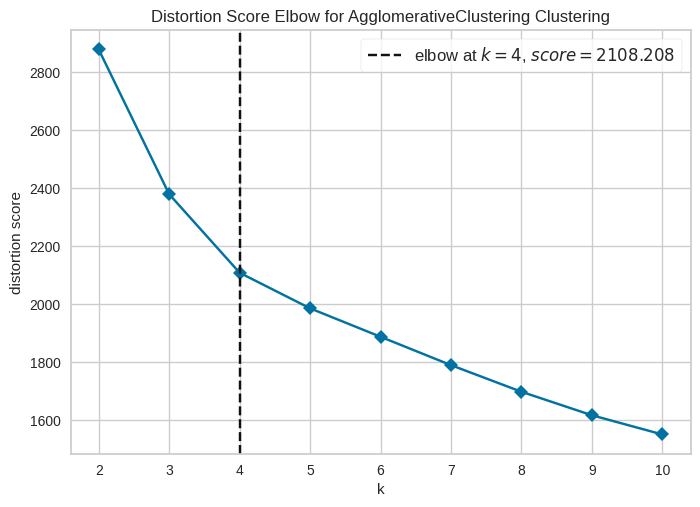

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5675,635.9428,1.1749,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5110,506.9230,1.6495,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5011,413.5872,1.8033,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4866,354.6248,1.7981,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [58]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4473,999.3069,0.8429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

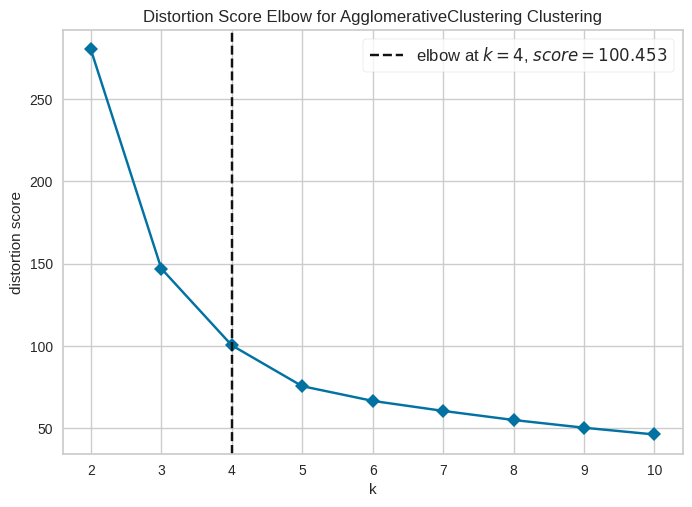

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4240,917.3254,0.6814,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4473,999.3069,0.8429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4267,1049.6351,0.8797,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4075,969.1729,0.9127,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [60]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4317,459.4082,1.7673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

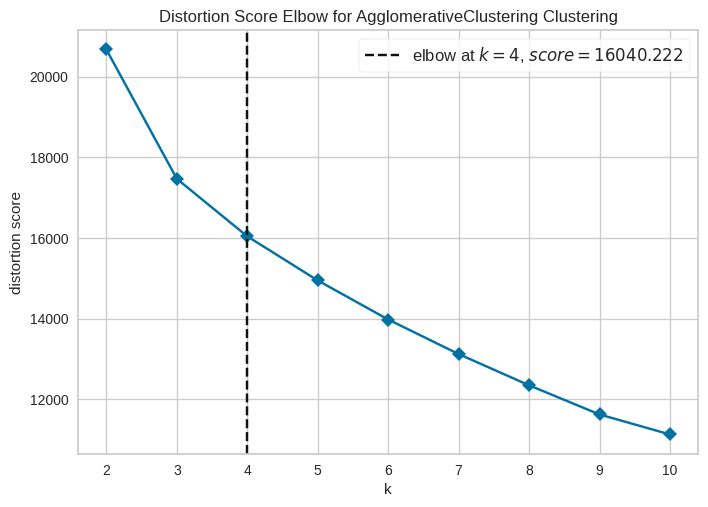

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5004,606.0001,1.6703,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4317,459.4082,1.7673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4326,381.6608,1.9859,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4371,335.3809,1.8139,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [61]:
#Elbow Plot
setup(data = dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)


# Transformation" + "Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

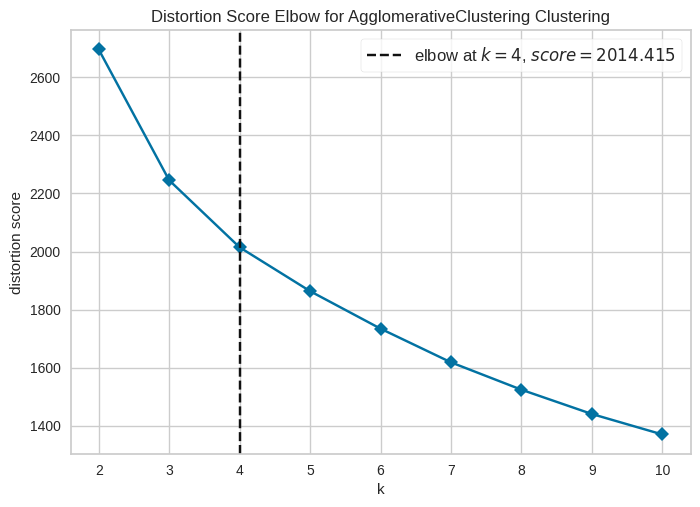

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4542,694.2909,1.1760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3746,451.7287,1.3675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2232,397.7946,1.7148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)




# "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

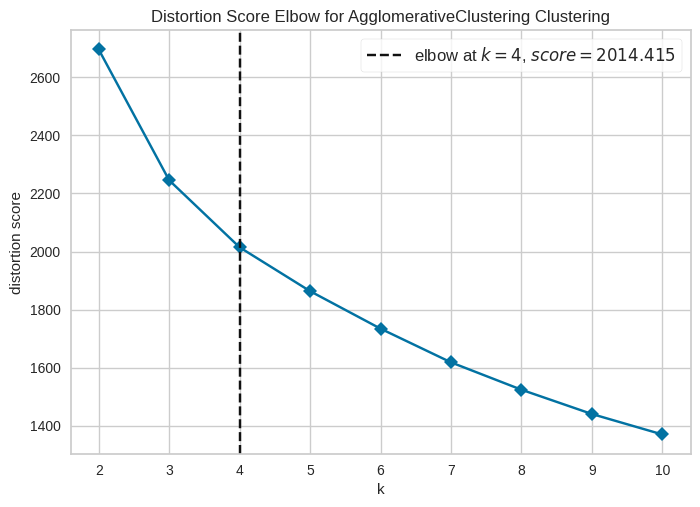

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4542,694.2909,1.1760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3746,451.7287,1.3675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2232,397.7946,1.7148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [63]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
y = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
z = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
w = create_model('hclust', num_clusters = 6)



# Mean shift clustering              'meanshift'

In [64]:
from pycaret.datasets import get_data
from pycaret.clustering import *

DataSet = get_data('cancer', verbose=False)
setup(data = DataSet, verbose=False)

x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [66]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('dbscan')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1575,243.7412,0.9447,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1575,243.7412,0.9447,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1575,243.7412,0.9447,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1575,243.7412,0.9447,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1575,243.7412,0.9447,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [67]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('dbscan')
# plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1860,2.0251,0.6396,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1860,2.0251,0.6396,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1860,2.0251,0.6396,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1860,2.0251,0.6396,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1860,2.0251,0.6396,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [68]:
#PCA
#Elbow Plot
setup(data = dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('dbscan')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0977,9.7214,1.0752,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [69]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('dbscan')


setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
x = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
x = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
x = create_model('dbscan', num_clusters = 6)




,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('dbscan')
# plot_model(x, plot = 'elbow')

setup(data = dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('dbscan', num_clusters = 3)

print("For Cluster = 4")
y = create_model('dbscan', num_clusters = 4)

print("For Cluster = 5")
z = create_model('dbscan', num_clusters = 5)

print("For Cluster = 6")
w = create_model('dbscan', num_clusters = 6)



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0521,23.6480,1.0020,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]